### Linear Regression

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tvmarketing.csv')

In [145]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [146]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [147]:
df.shape

(200, 2)

In [148]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


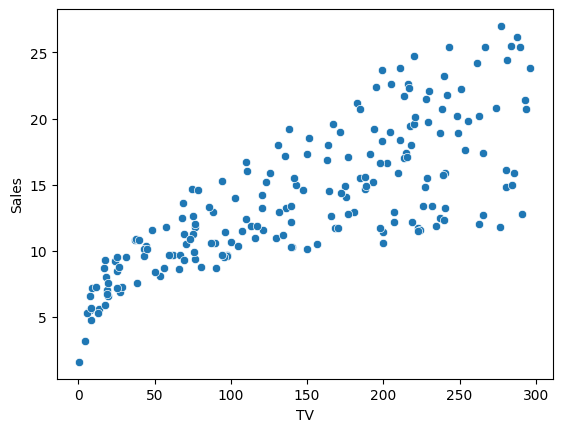

In [149]:
sns.scatterplot(x='TV', y='Sales', data=df)
plt.show()

In [150]:
x=df[['TV']]
y=df['Sales']

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [152]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 1), (60, 1), (140,), (60,))

In [153]:
x_mean = x_train['TV'].mean()
y_mean = y_train.mean()
num = ((x_train['TV']-x_mean)*(y_train-y_mean)).sum()
den = ((x_train['TV']-x_mean)**2).sum()
slope = num/den
intercept = y_mean - slope*x_mean
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 0.04640780212815278, Intercept: 7.2394598307511355


In [154]:
#create the model using the calculated coeffiecients and make predictions on the testing set
y_pred = slope*x_test['TV'] + intercept
y_pred.head()

95     14.817854
15     16.307544
30     20.832305
158     7.782431
128    17.463099
Name: TV, dtype: float64

In [155]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [156]:
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [0.0464078]
Intercept:  7.239459830751138


In [157]:
y_pred = lr.predict(x_test)
y_pred[:5]

array([14.81785392, 16.30754437, 20.83230507,  7.78243112, 17.46309864])

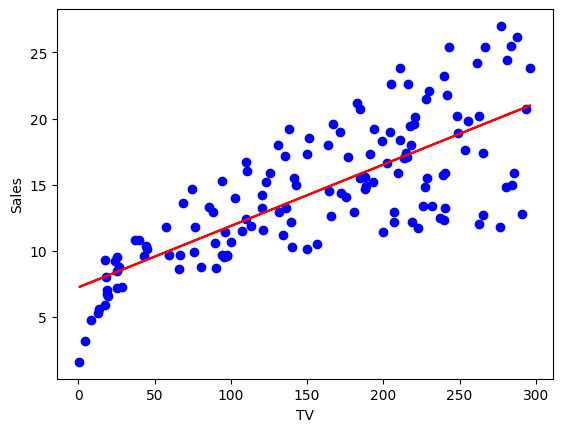

In [158]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, lr.predict(x_train), color='red')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

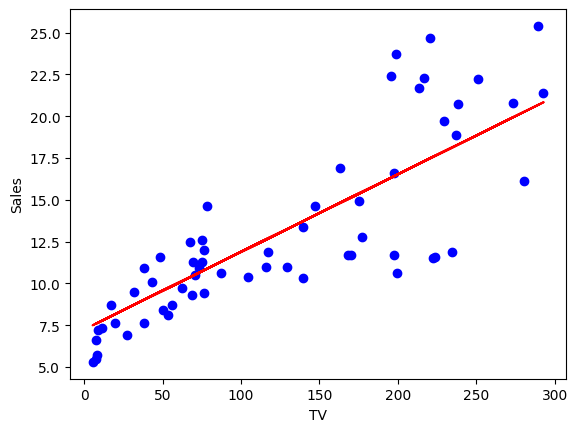

In [159]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [160]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  8.970991242413614
R2:  0.6714477229302764


In [161]:
ss_t = ((y_test-y_test.mean())**2).sum()
ss_r = ((y_test-y_pred)**2).sum()
r2_man = 1-(ss_r/ss_t)
n=len(y_test)
p=1
adj_r2 = 1-((1-r2_man)*(n-1)/(n-p-1))

print("R2 (manual): ", r2_man)
print("Adjusted R2 (manual): ", adj_r2)

R2 (manual):  0.6714477229302764
Adjusted R2 (manual):  0.6657830284980398


### MLR

In [162]:
dm = pd.read_csv('Housing.csv')
dm.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [163]:
dm.shape

(545, 13)

In [164]:
dm.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [165]:
print(dm.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [166]:
dm.fillna(df.mean(numeric_only=True), inplace=True)

In [167]:
xm=dm.drop('price', axis=1)
ym=dm['price']


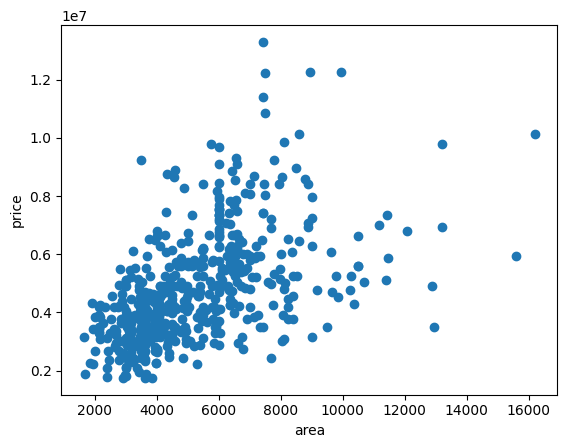

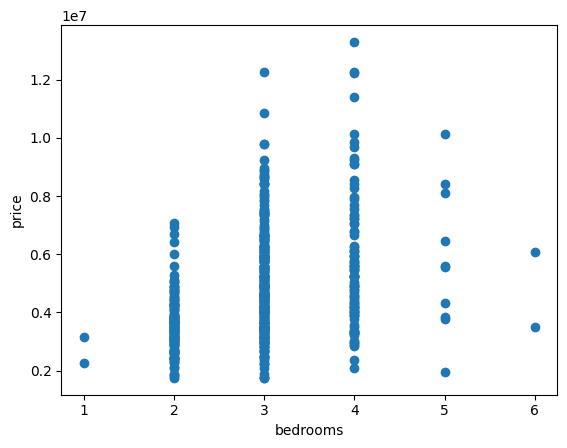

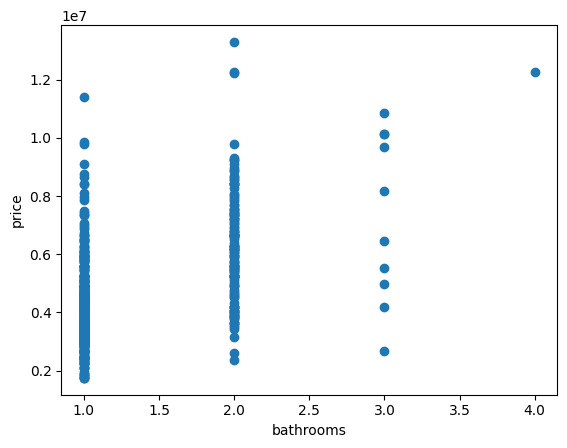

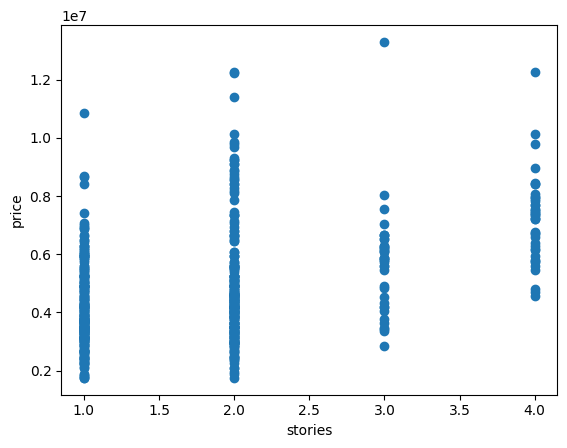

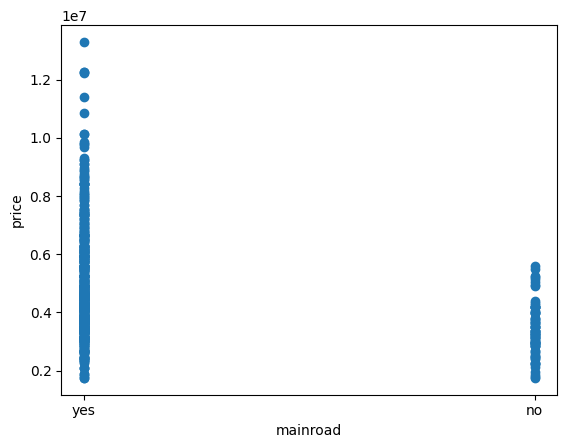

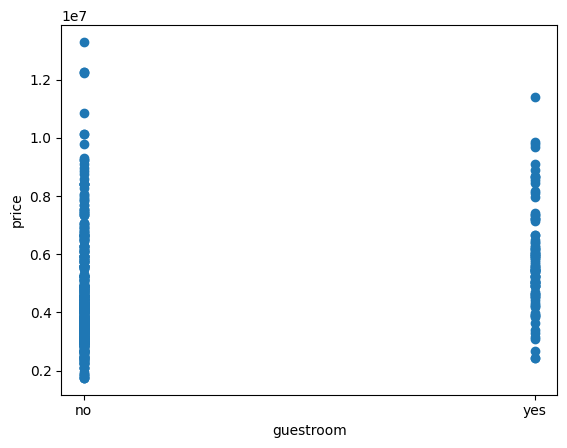

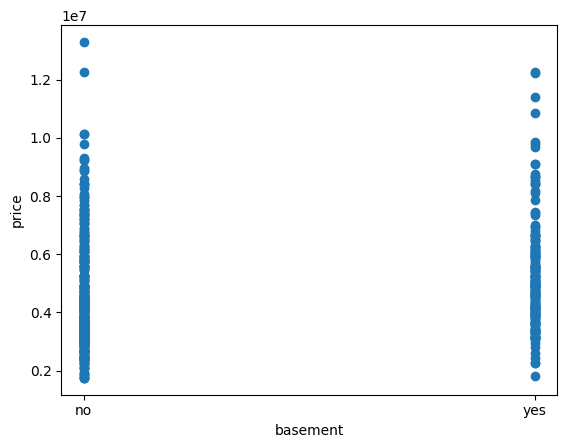

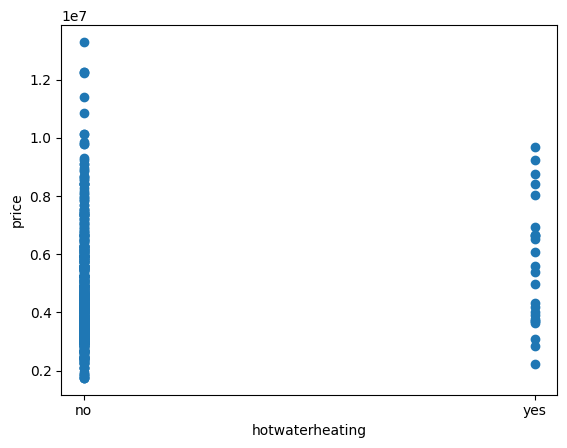

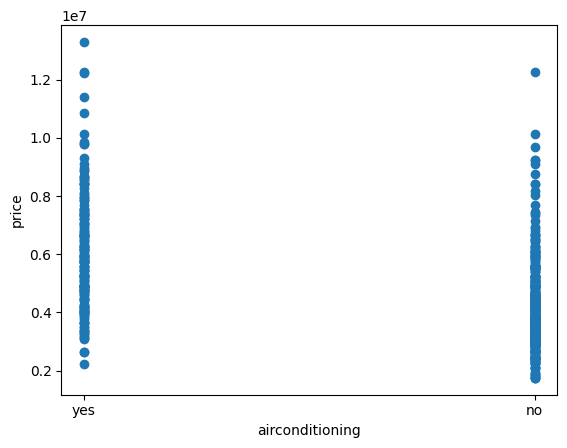

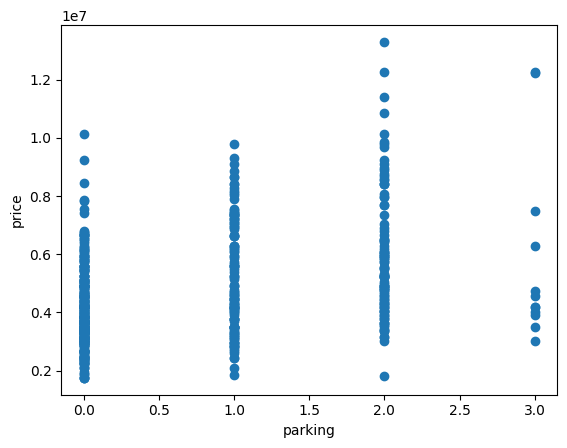

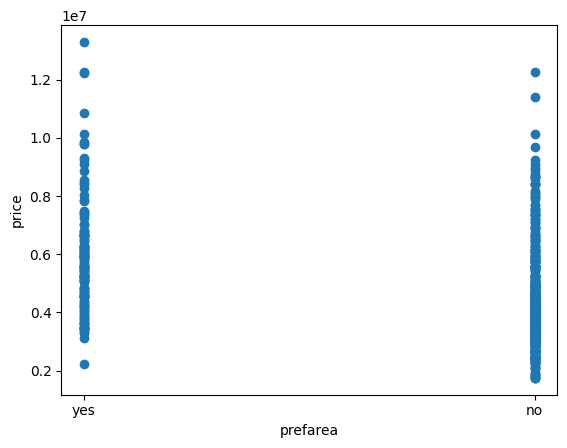

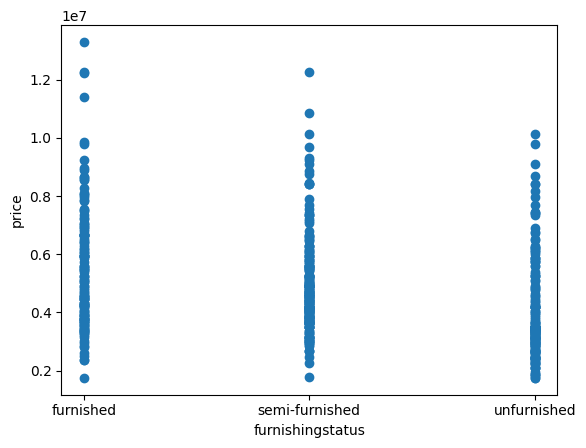

In [168]:
for col in xm.columns:
    plt.scatter(xm[col], ym)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

In [169]:
#Encoding categorical variables
xm = pd.get_dummies(xm, drop_first=True)
xm.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [170]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
xm_s = s.fit_transform(xm)
xm[:5]

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [171]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xm_s, ym, test_size=0.3, random_state=42)
xm_train.shape, xm_test.shape, ym_train.shape, ym_test.shape

((381, 13), (164, 13), (381,), (164,))

In [172]:
ml = LinearRegression()
ml.fit(xm_train, ym_train)

LinearRegression()

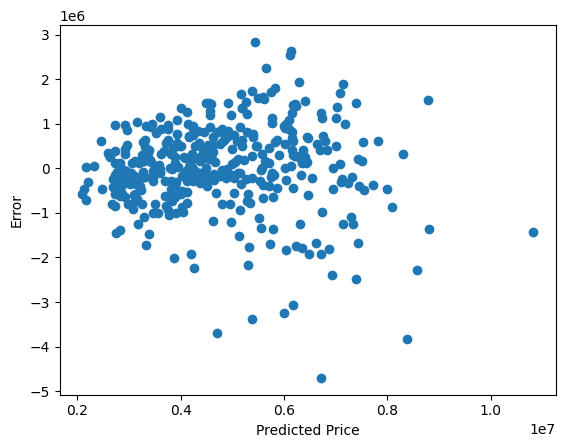

In [173]:
y_pred_train = ml.predict(xm_train)
error_train = y_pred_train - ym_train

plt.scatter(y_pred_train, error_train)
plt.xlabel("Predicted Price")
plt.ylabel("Error")
plt.show()

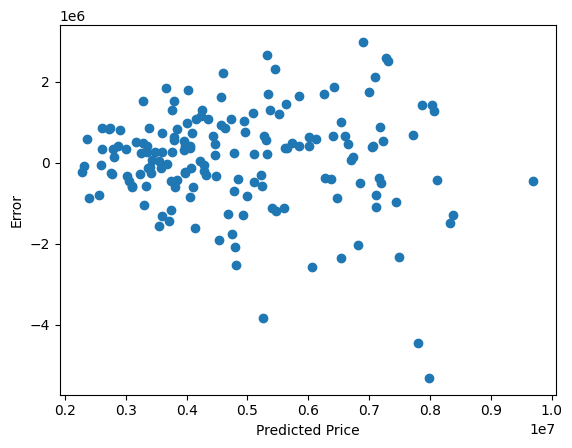

In [174]:
y_pred_test = ml.predict(xm_test)
error_test = y_pred_test - ym_test

plt.scatter(y_pred_test, error_test)
plt.xlabel("Predicted Price")
plt.ylabel("Error")
plt.show()

In [175]:
print("MSE: ", mean_squared_error(ym_test, y_pred_test))
print("R2: ", r2_score(ym_test, y_pred_test))

MSE:  1523019469501.2913
R2:  0.6463350878895877


In [176]:
# Step 11: Adjusted R2 (using 5 features only)
x_reduced = xm_s[:, :5]
x_reduced_scaled = s.fit_transform(x_reduced)
xm_train_r, xm_test_r, ym_train_r, ym_test_r = train_test_split(x_reduced_scaled, ym, test_size=0.3, random_state=42)

model_r = LinearRegression()
model_r.fit(xm_train_r, ym_train_r)
y_pred_r = model_r.predict(xm_test_r)

r2_r = r2_score(ym_test_r, y_pred_r)
n = xm_test_r.shape[0]
k = xm_test_r.shape[1]
adj_r2 = 1 - (1 - r2_r) * (n - 1) / (n - k - 1)
print('Adjusted R2:', adj_r2)

Adjusted R2: 0.5102967238087244


### Decision Trees

In [177]:
dd = pd.read_csv('train_titanic.csv')
dd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
dd.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [179]:
dd.shape

(891, 12)

In [180]:
dd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

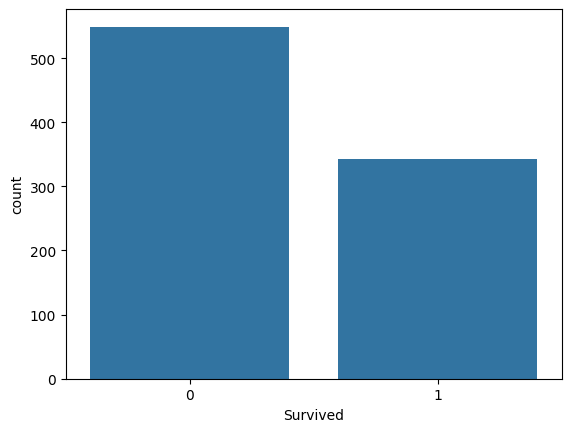

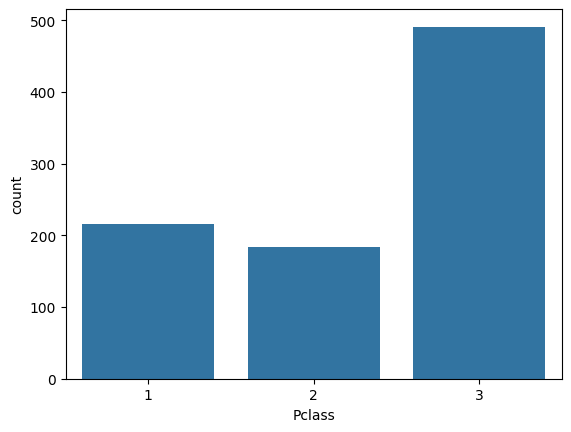

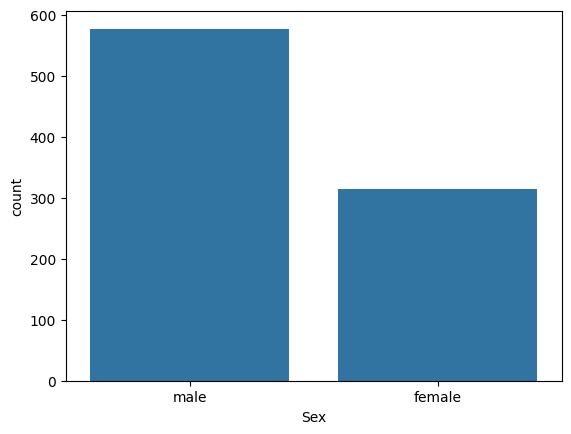

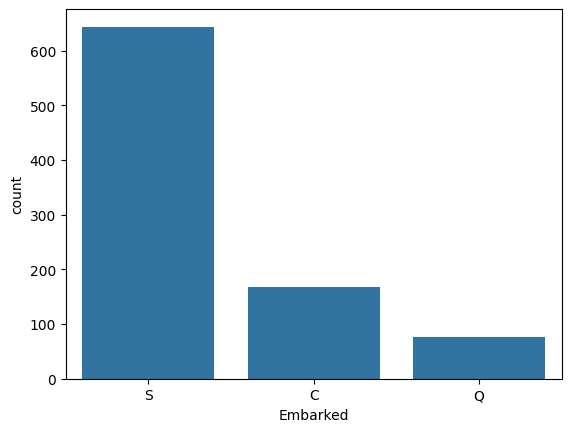

In [181]:
cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for cols in cols:
    sns.countplot(x=dd[cols])
    plt.show()

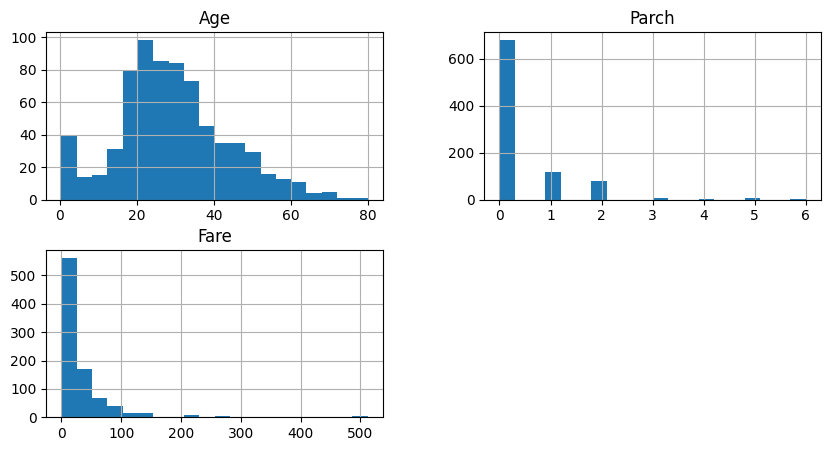

In [182]:
dd[['Age', 'Parch', 'Fare']].hist(figsize=(10, 5), bins=20)
plt.show()

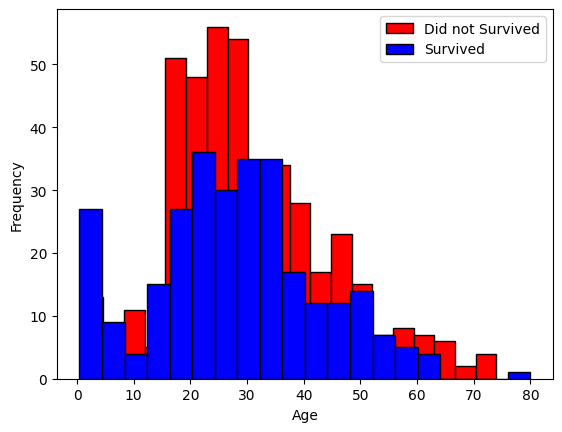

In [183]:
plt.hist(dd[dd['Survived']==0]['Age'], bins=20, edgecolor='black', color='red', label='Did not Survived')
plt.hist(dd[dd['Survived']==1]['Age'], bins=20, edgecolor='black', color='blue', label='Survived')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

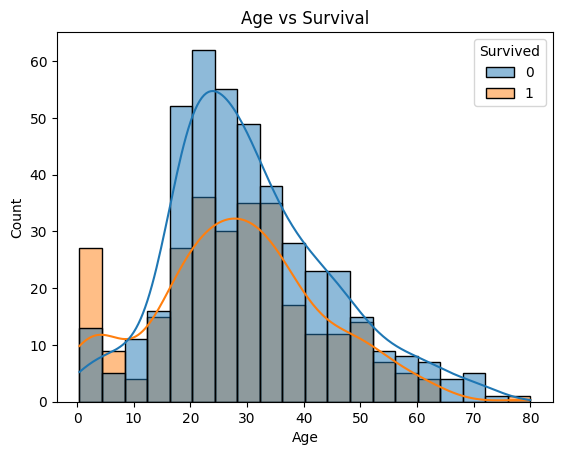

In [184]:
sns.histplot(data=dd, x='Age', hue='Survived', bins=20, kde=True)
plt.title("Age vs Survival")
plt.show()

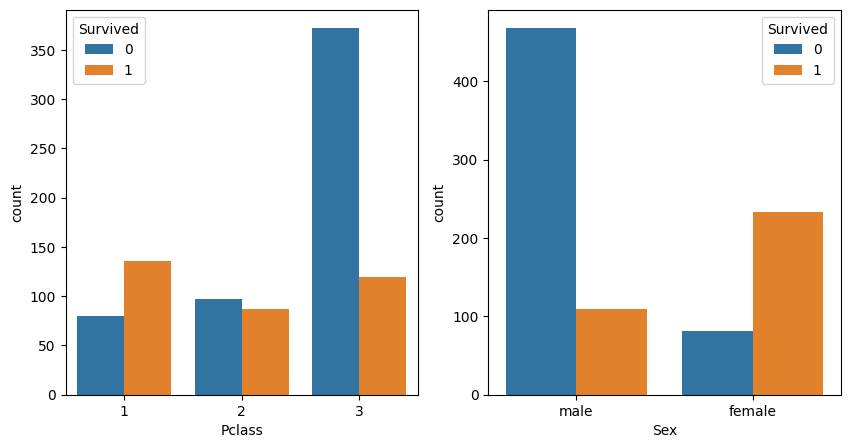

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=dd, ax=ax[0])
sns.countplot(x='Sex', hue='Survived', data=dd, ax=ax[1])
plt.show()

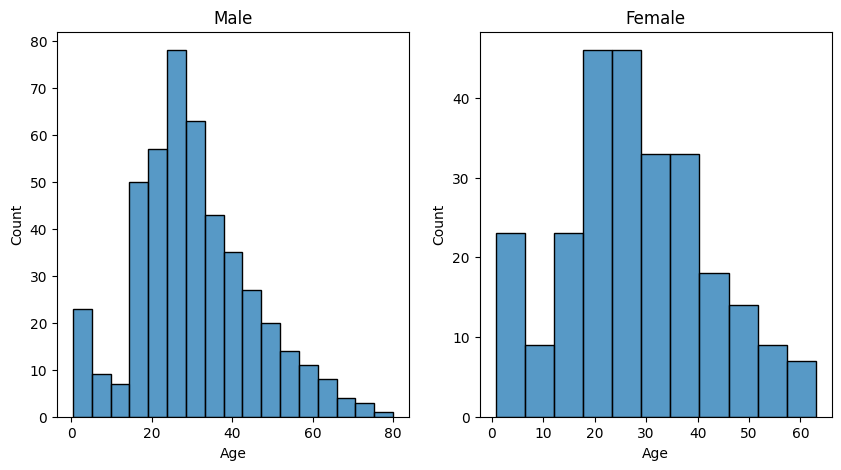

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(dd[dd['Sex']=='male']['Age'], edgecolor='black', ax=ax[0])
ax[0].set_title('Male')
sns.histplot(dd[dd['Sex']=='female']['Age'], edgecolor='black', ax=ax[1])
ax[1].set_title('Female')
plt.show()

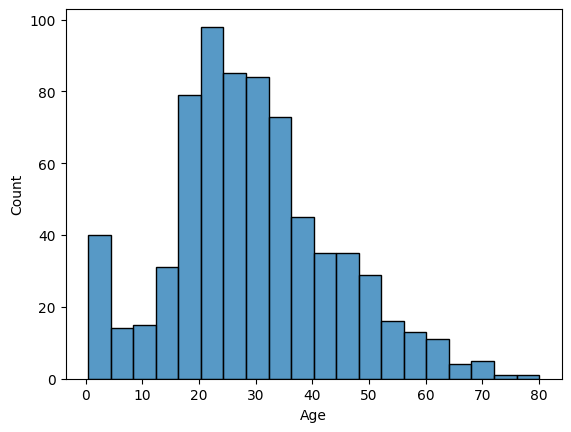

In [187]:
sns.histplot(dd['Age'], bins=20, edgecolor='black')
plt.show()


In [188]:
dd['Embarked'].fillna('S', inplace=True)

C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_5372\1885462622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd['Embarked'].fillna('S', inplace=True)


In [189]:
dd['Fare'].fillna(dd['Fare'].median(), inplace=True)

C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_5372\1069575122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd['Fare'].fillna(dd['Fare'].median(), inplace=True)


In [190]:
age_mean = dd['Age'].mean()
age_std = dd['Age'].std()
age_null = dd['Age'].isnull().sum()

age_ran = np.random.randint(age_mean-age_std, age_mean+age_std, size=age_null)
dd.loc[np.isnan(dd['Age']), 'Age'] = age_ran
dd['Age']=dd['Age'].astype(int)

In [191]:
dd['FamilySize'] = dd['Parch']+dd['SibSp']+1

In [192]:
dd['IsAlone']=1
dd['IsAlone'].loc[dd['FamilySize']>1]=0

C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_5372\1940991137.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dd['IsAlone'].loc[dd['FamilySize']>1]=0
C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_5372\1940991137.py:2: SettingWithCopyWa

In [193]:
dd['Has_cabin'] = dd['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [194]:
dd.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [195]:
xd=dd.drop('Survived', axis=1)
yd=dd['Survived']

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xd['Sex'] = le.fit_transform(xd['Sex'])
xd['Embarked'] = le.fit_transform(xd['Embarked'])

In [201]:
xd=pd.concat([xd, pd.get_dummies(xd['Pclass'], prefix='Pclass', drop_first=True)], axis=1)
xd.drop('Pclass', axis=1, inplace=True)

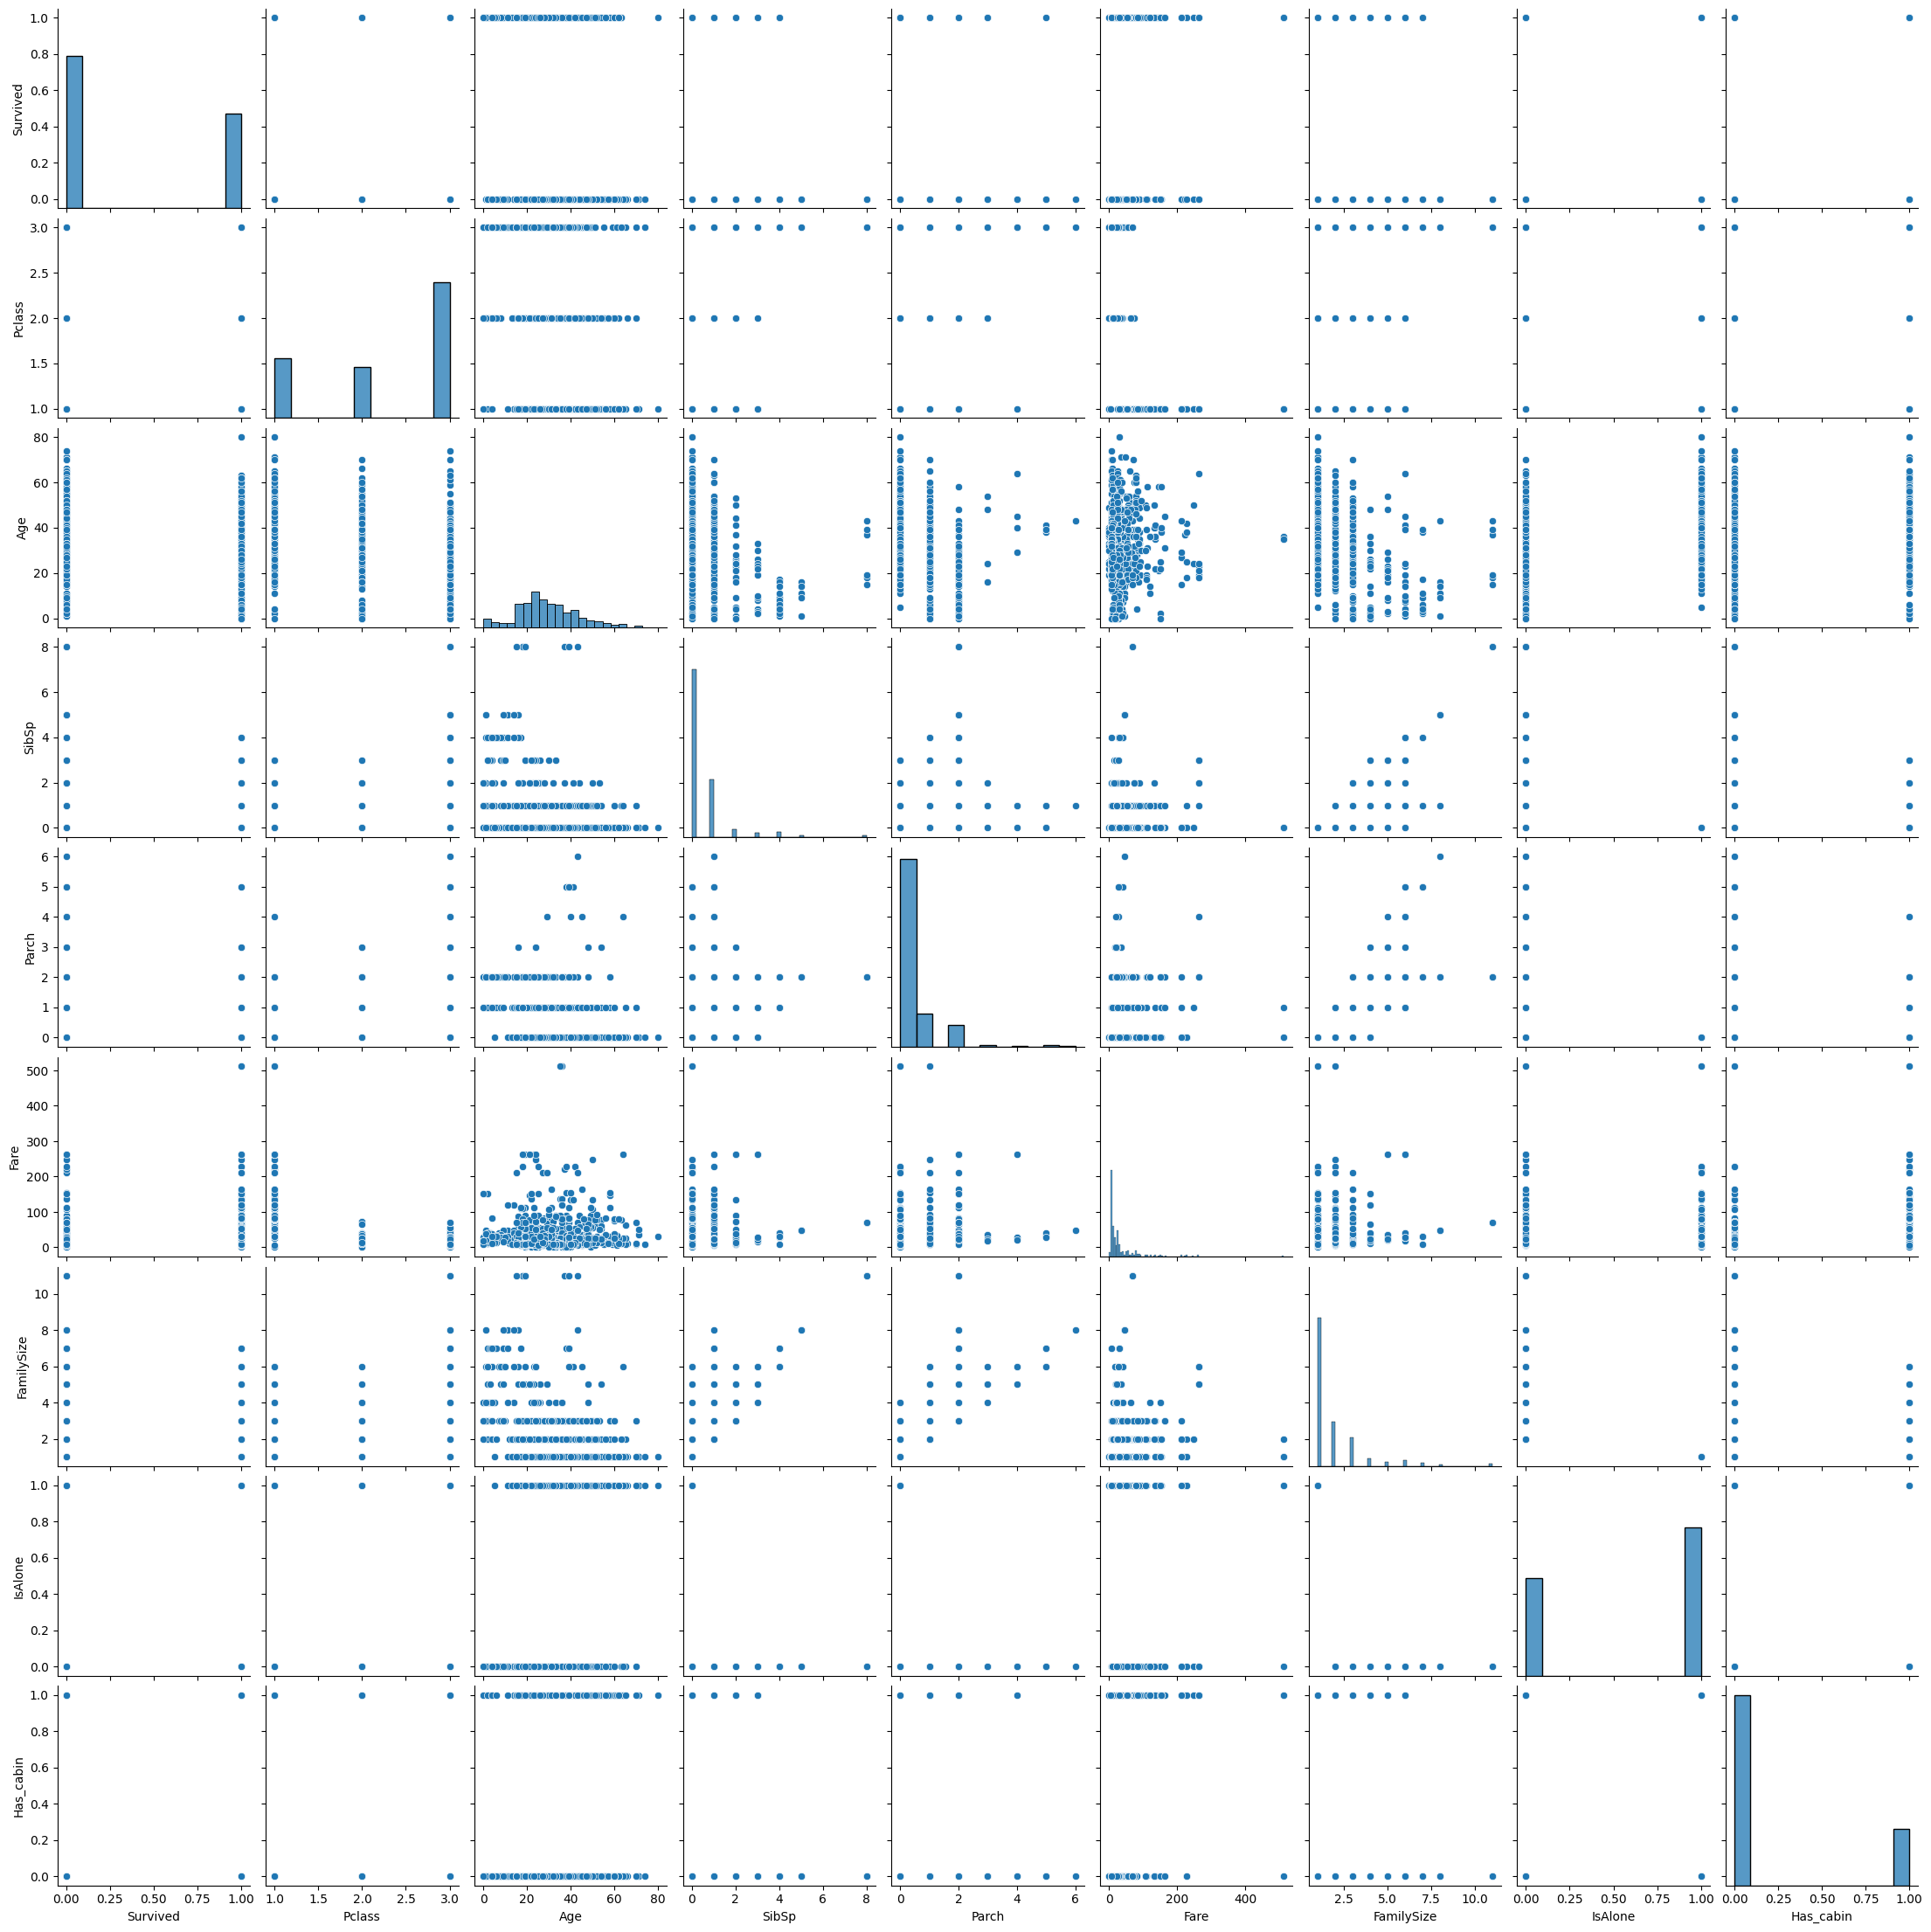

In [203]:
sns.pairplot(dd)
plt.show()

In [204]:
xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size=0.3, random_state=42)
xd_train.shape, xd_test.shape, yd_train.shape, yd_test.shape

((623, 15), (268, 15), (623,), (268,))

In [207]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
md=DecisionTreeClassifier(random_state=42)
md.fit(xd_train, yd_train)

DecisionTreeClassifier(random_state=42)

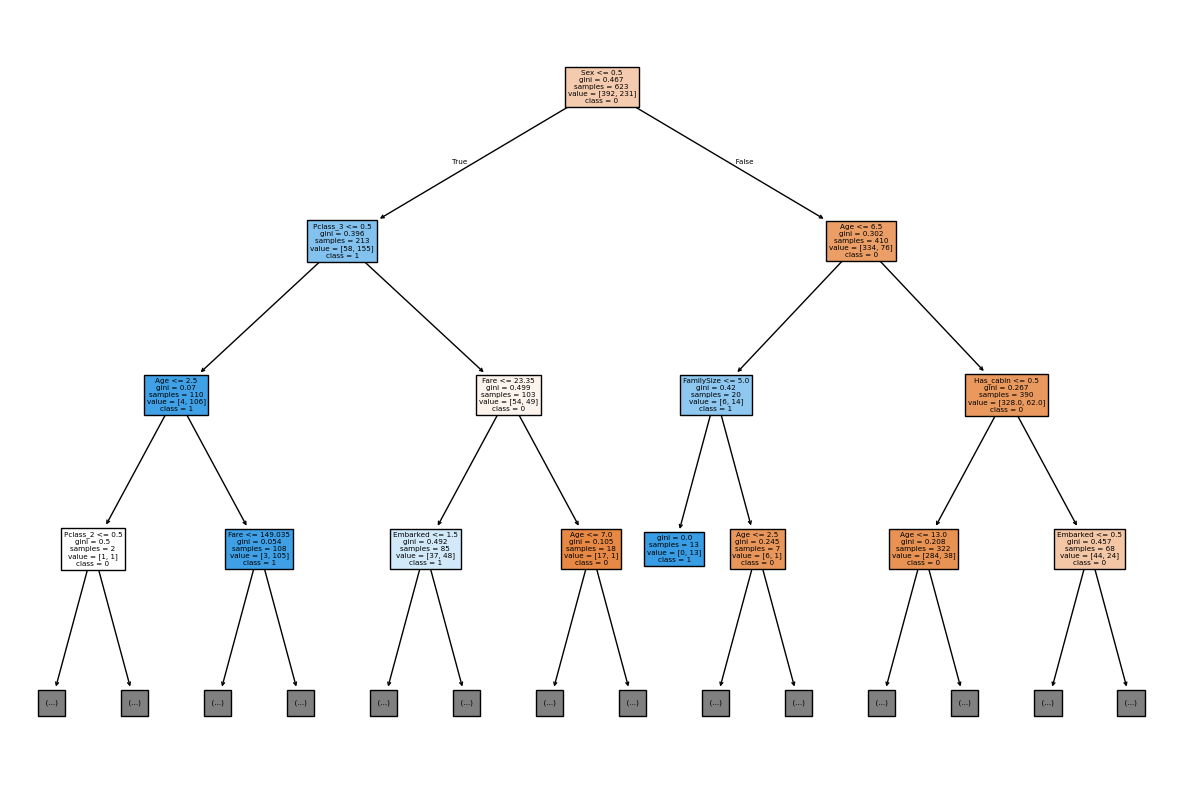

In [210]:
plt.figure(figsize=(15, 10))
plot_tree(md, filled=True, feature_names=xd.columns, class_names=['0', '1'], max_depth=3)
plt.show()

In [211]:
from sklearn.metrics import confusion_matrix, classification_report
yd_pred = md.predict(xd_test)
print("Accuracy: ", md.score(xd_test, yd_test))
print("Confusion Matrix: \n", confusion_matrix(yd_test, yd_pred))
print("Classification Report: \n", classification_report(yd_test, yd_pred))

Accuracy:  0.7574626865671642
Confusion Matrix: 
 [[127  30]
 [ 35  76]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       157
           1       0.72      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



### K Nearest Neighbors

In [212]:
dk = pd.read_csv('Week7_train.csv')
dk.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
dk.shape

(42000, 785)

In [214]:
dk_sam = dk.sample(frac=0.1, random_state=42)
dk_sam.shape

(4200, 785)

In [215]:
dk_sam.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
print(dk['label'].nunique())

10


In [217]:
print(dk['label'].value_counts())

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [218]:
x = dk.drop('label', axis=1)
y = dk['label']

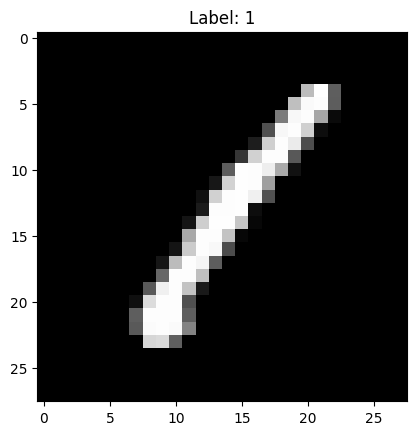

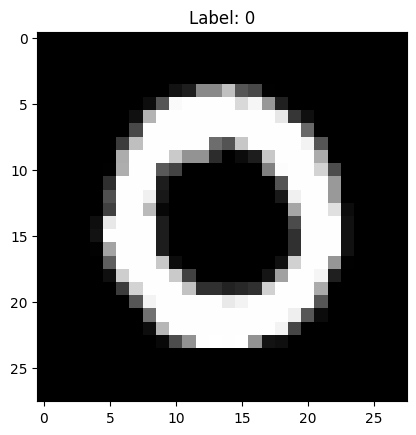

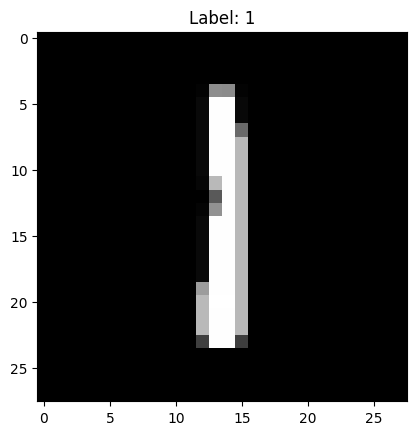

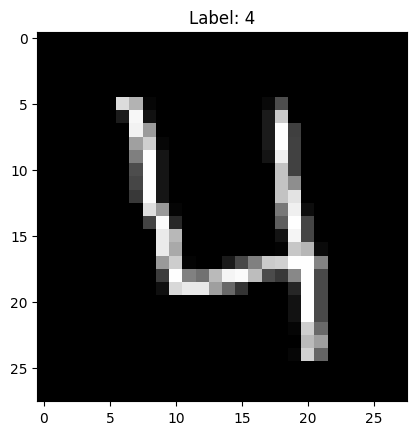

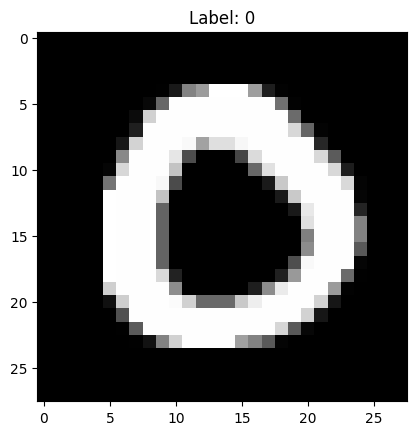

In [219]:
for i in range(5):
    plt.imshow(x.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y.iloc[i]}")
    plt.show()

In [220]:
xk_train, xk_test, yk_train, yk_test = train_test_split(x, y, test_size=0.3, random_state=42)
xk_train.shape, xk_test.shape, yk_train.shape, yk_test.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [221]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xk_train, yk_train)

KNeighborsClassifier(n_neighbors=3)

In [222]:
yk_pred = knn.predict(xk_test)

In [223]:
print(confusion_matrix(yk_test, yk_pred))
print(classification_report(yk_test, yk_pred))
print("Accuracy: ", knn.score(xk_test, yk_test))

[[1197    0    0    0    0    0    3    0    0    0]
 [   0 1384    1    0    0    1    2    0    0    1]
 [  11   17 1228    5    3    3    2   21    4    0]
 [   4    6    9 1295    0   12    2   10   10    7]
 [   2   10    0    0 1183    0    4    2    0   21]
 [   1    2    0   22    1 1040    8    0    4    7]
 [   7    2    1    1    3    4 1237    0    1    0]
 [   0   22    3    0    3    0    0 1314    0   17]
 [   4   13    7   16    3   21    4    2 1128   11]
 [   9    3    1   11   16    1    0   18    0 1172]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1200
           1       0.95      1.00      0.97      1389
           2       0.98      0.95      0.97      1294
           3       0.96      0.96      0.96      1355
           4       0.98      0.97      0.97      1222
           5       0.96      0.96      0.96      1085
           6       0.98      0.98      0.98      1256
           7       0.96      0.97   

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
5457        0       0       0       0       0       0       0       0       0   
38509       0       0       0       0       0       0       0       0       0   
25536       0       0       0       0       0       0       0       0       0   
31803       0       0       0       0       0       0       0       0       0   
39863       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
5457        0  ...         0         0         0         0         0   
38509       0  ...         0         0         0         0         0   
25536       0  ...         0         0         0         0         0   
31803       0  ...         0         0         0         0         0   
39863       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
5457          0       

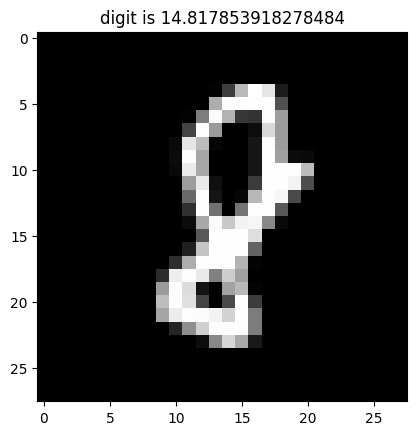

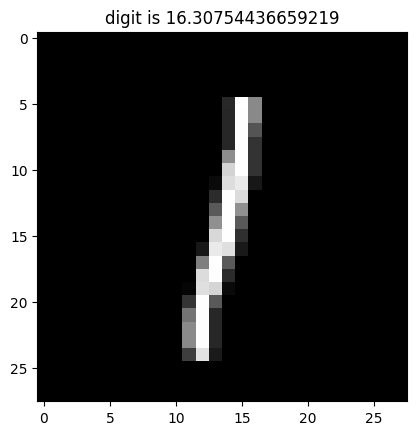

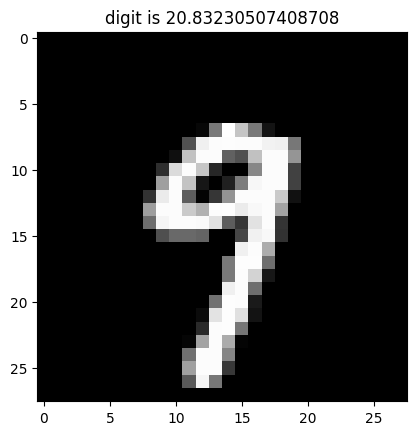

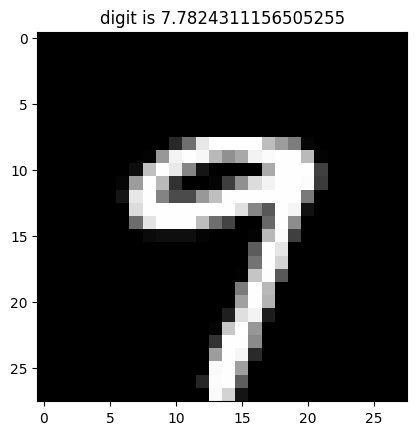

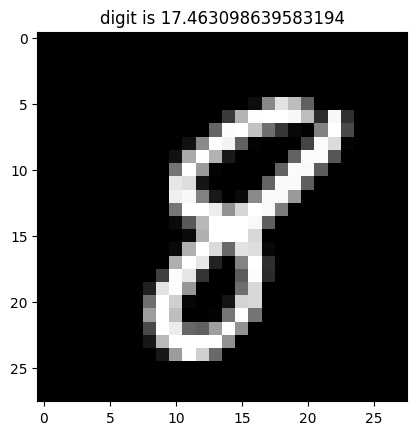

In [225]:
print(xk_test.head())
print(yk_pred[:5])
for i in range(5):
    plt.imshow(xk_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"digit is {y_pred[i]}")
    plt.show()

### Naive Bayes

In [226]:
from sklearn.datasets import fetch_20newsgroups
train_data=fetch_20newsgroups(subset='train')
test_data=fetch_20newsgroups(subset='test')

In [227]:
train_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [228]:
cat = ['alt.atheism', 'comp.graphics', 'sci.space']

In [229]:
train_sub=fetch_20newsgroups(subset='train', categories=cat)
test_sub=fetch_20newsgroups(subset='test', categories=cat)

In [231]:
train_sub.target_names

['alt.atheism', 'comp.graphics', 'sci.space']

In [233]:
print(train_sub.data[4])

From: henry@zoo.toronto.edu (Henry Spencer)
Subject: Re: TRUE "GLOBE", Who makes it?
Organization: U of Toronto Zoology
Lines: 12

In article <bill.047m@xpresso.UUCP> bill@xpresso.UUCP (Bill Vance) writes:
>It has been known for quite a while that the earth is actually more pear
>shaped than globular/spherical.  Does anyone make a "globe" that is accurate
>as to actual shape, landmass configuration/Long/Lat lines etc.?

I don't think you're going to be able to see the differences from a sphere
unless they are greatly exaggerated.  Even the equatorial bulge is only
about 1 part in 300 -- you'd never notice a 1mm error in a 30cm globe --
and the other deviations from spherical shape are much smaller.
-- 
SVR4 resembles a high-speed collision   | Henry Spencer @ U of Toronto Zoology
between SVR3 and SunOS.    - Dick Dunn  |  henry@zoo.toronto.edu  utzoo!henry



In [234]:
print(len(train_sub.data))
print(len(train_sub.target))

1657
1657


In [235]:
print(train_sub.filenames[:5])

['C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60869'
 'C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38633'
 'C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\53534'
 'C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38516'
 'C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61210']


In [243]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
xcv_train = cv.fit_transform(train_sub.data)
xcv_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 255224 stored elements and shape (1657, 29663)>

In [248]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
bnb = BernoulliNB()
bnb.fit(xcv_train, train_sub.target)

BernoulliNB()

In [249]:
xcv_test = cv.transform(test_sub.data)

In [250]:
ycv_pred = bnb.predict(xcv_test)

In [251]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_sub.target, ycv_pred))

0.852994555353902


In [252]:
tfidf = TfidfVectorizer()
x_train_tf = tfidf.fit_transform(train_sub.data)
x_test_tf = tfidf.transform(test_sub.data)

mnb = MultinomialNB()
mnb.fit(x_train_tf, train_sub.target)
y_pred_tf = mnb.predict(x_test_tf)

In [253]:
print(accuracy_score(test_sub.target, y_pred_tf))

0.9473684210526315


In [254]:
#try avoiding stopwords and repeat the same
tfidf = TfidfVectorizer(stop_words='english')
x_train_tf = tfidf.fit_transform(train_sub.data)
x_test_tf = tfidf.transform(test_sub.data)
mnb = MultinomialNB()
mnb.fit(x_train_tf, train_sub.target)
y_pred_tf = mnb.predict(x_test_tf)
print(accuracy_score(test_sub.target, y_pred_tf))

0.9555353901996371


### SVM

In [255]:
from sklearn.datasets import load_iris
data = load_iris()

In [256]:
ds = pd.DataFrame(data.data, columns=data.feature_names)
ds['species'] = data.target

In [257]:
ds.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

In [258]:
ds.shape

(150, 5)

In [259]:
ds.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [260]:
ds.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [262]:
ds['species'].unique()

array([0, 1, 2])

In [263]:
ds['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [264]:
ds.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [265]:
ds.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


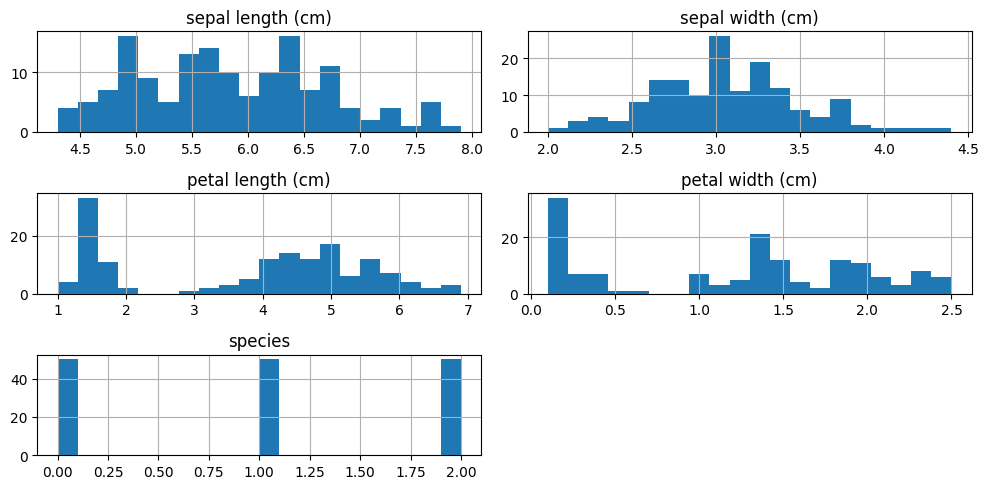

In [266]:
ds.hist(figsize=(10, 5), bins=20)
plt.tight_layout()
plt.show()

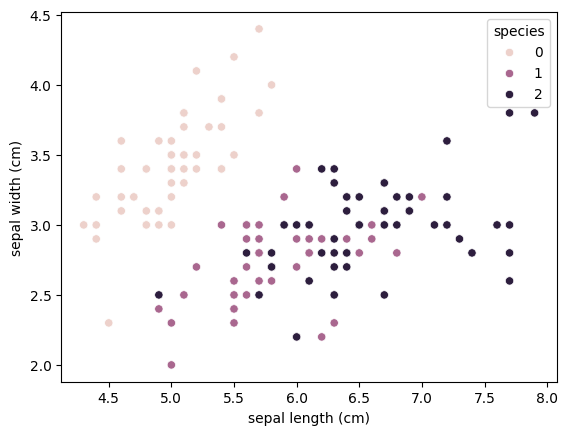

In [268]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=ds, hue='species')
plt.show()

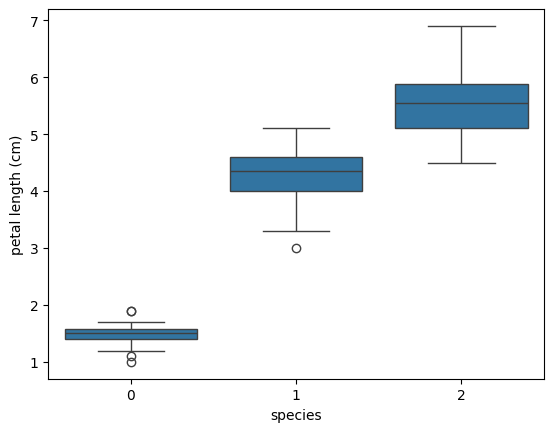

In [271]:
sns.boxplot(x='species', y='petal length (cm)', data=ds)
plt.show()

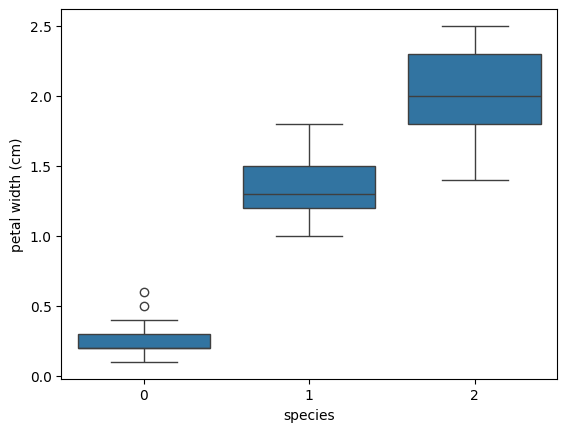

In [272]:
sns.boxplot(x='species', y='petal width (cm)', data=ds)
plt.show()

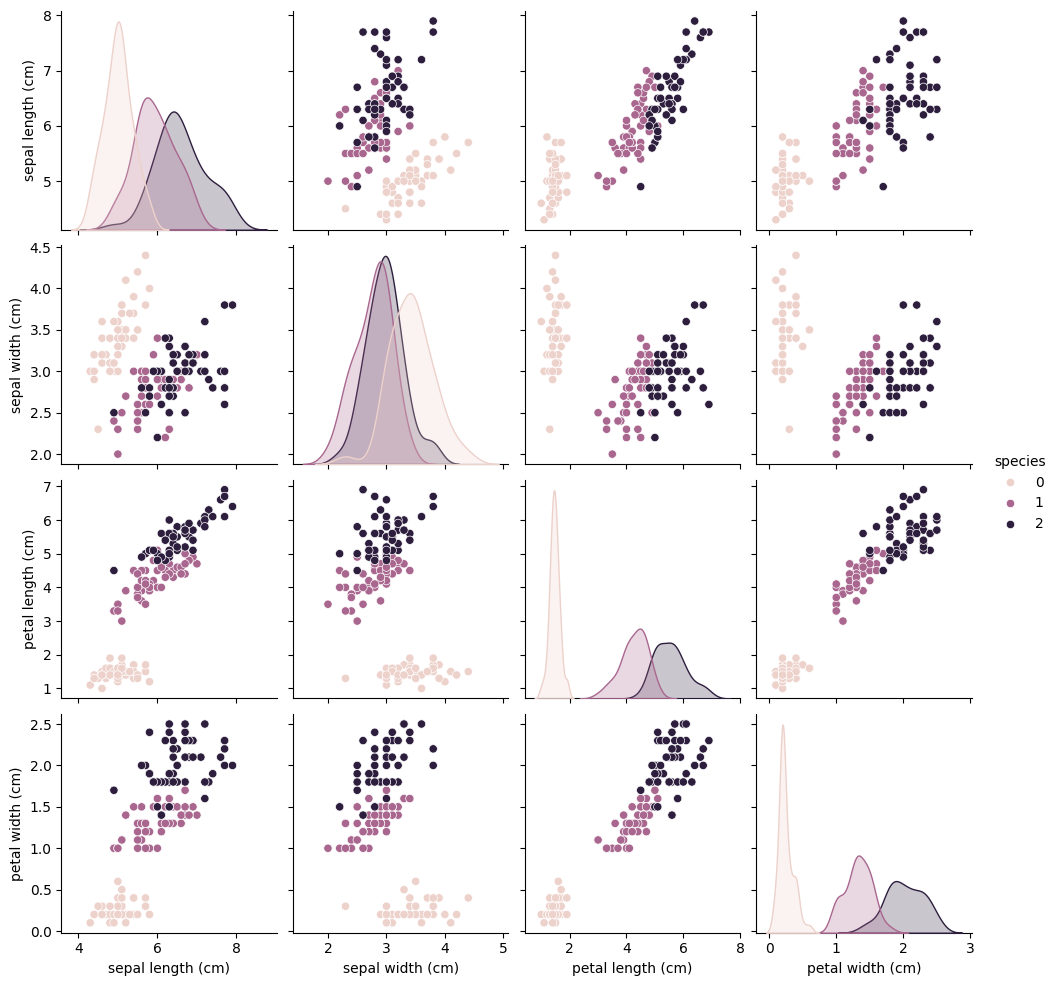

In [273]:
sns.pairplot(ds, hue='species')
plt.show()

In [275]:
ds.drop('species', axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [276]:
x=ds.drop('species', axis=1)
y=ds['species']

In [277]:
xs_train, xs_test, ys_train, ys_test = train_test_split(x, y, test_size=0.3, random_state=42)
xs_train.shape, xs_test.shape, ys_train.shape, ys_test.shape

((105, 4), (45, 4), (105,), (45,))

In [278]:
from sklearn.svm import SVC
svm = SVC(C=1)
svm.fit(xs_train, ys_train)


SVC(C=1)

In [279]:
ys_pred = svm.predict(xs_test)

In [280]:
print('Classification Report: \n', classification_report(ys_test, ys_pred))
print('Confusion Matrix: \n', confusion_matrix(ys_test, ys_pred))
print('Accuracy: ', accuracy_score(ys_test, ys_pred))
print('SVM Score: ', svm.score(xs_test, ys_test))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy:  1.0
SVM Score:  1.0


### K Mean Clustering

In [281]:
iris = load_iris()

In [282]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [283]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [285]:
dkm = pd.DataFrame(iris.data)
dkm.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [286]:
dkm.rename(columns={0:'sepal_length', 1:'sepal_width', 2:'petal_length', 3:'petal_width'}, inplace=True)
dkm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


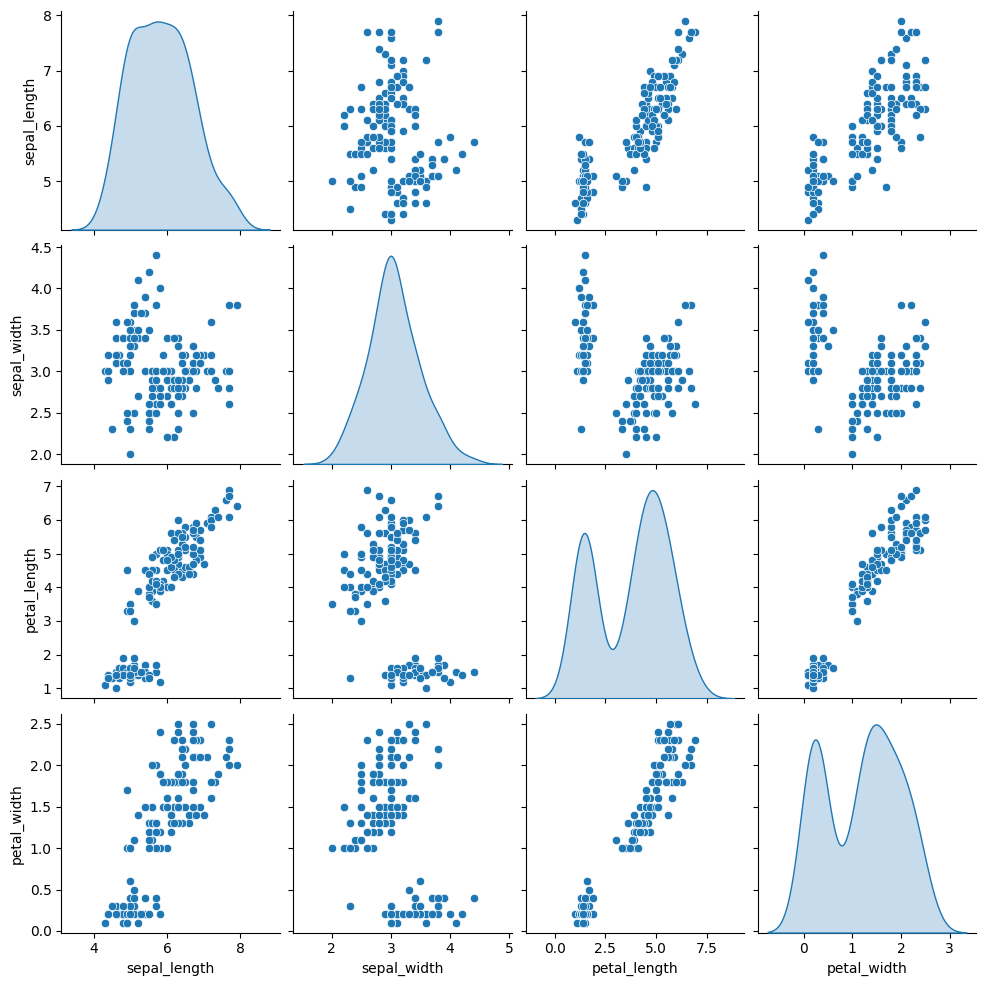

In [287]:
sns.pairplot(dkm[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], diag_kind='kde')
plt.show()

In [288]:
from sklearn.cluster import KMeans
k_ran = range(1, 10)
sse=[]
for k in k_ran:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_predict(dkm[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    sse.append(km.inertia_)

In [289]:
sse

[681.3706,
 152.3479517603579,
 78.85566582597731,
 57.35088021295475,
 46.47223015873017,
 39.066035353535355,
 34.30581529581531,
 30.476222943722952,
 29.906246659137963]

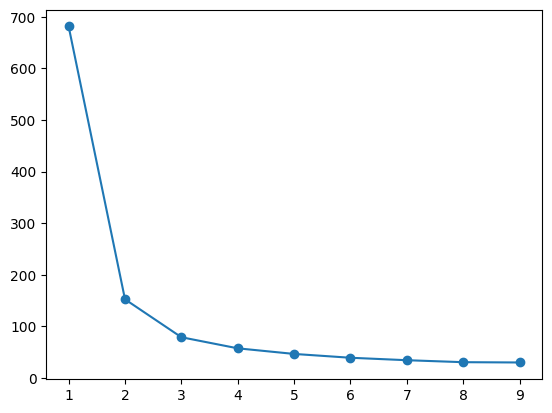

In [290]:
plt.plot(k_ran, sse, marker='o')
plt.show()

In [291]:
km = KMeans(n_clusters=3, n_init=10)
km.fit_predict(dkm[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [292]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [293]:
dkm['target'] = km.labels_
dkm.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [294]:
km.inertia_

78.851441426146

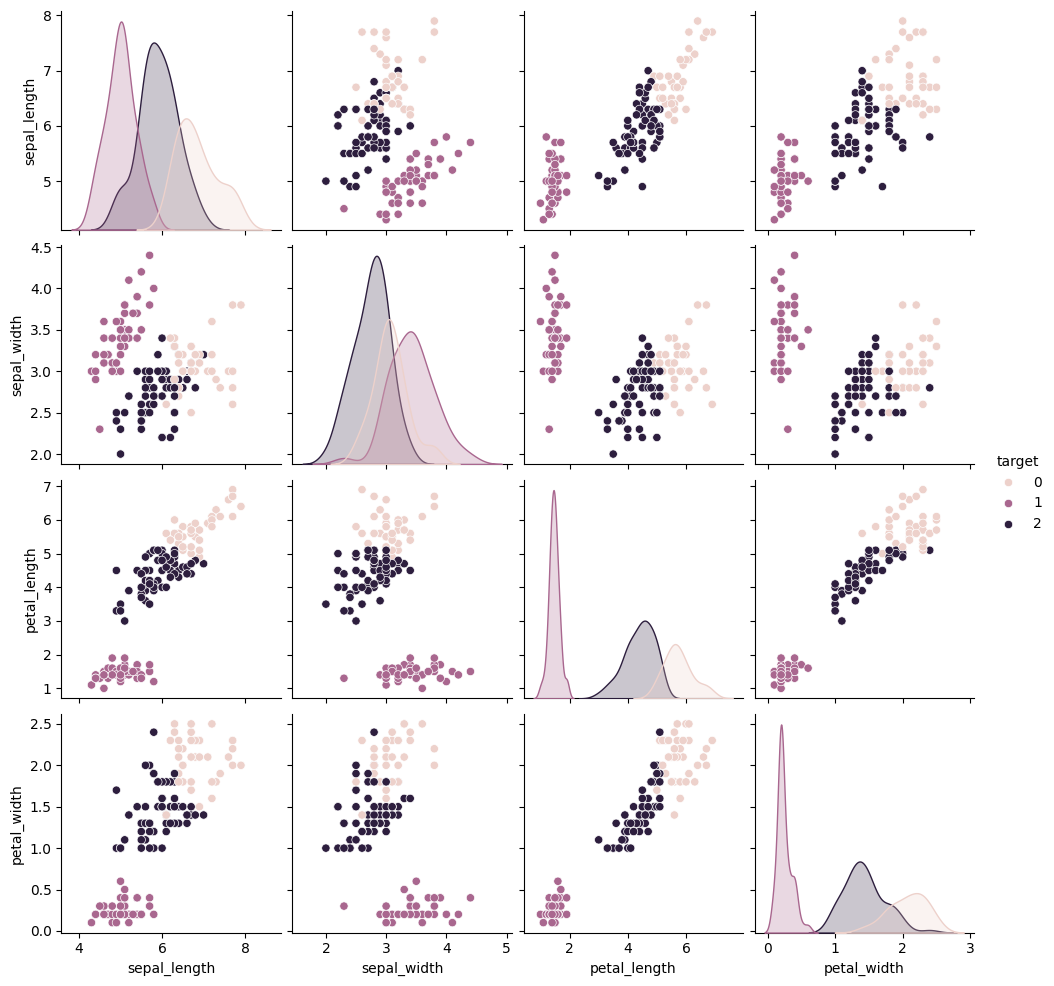

In [295]:
sns.pairplot(dkm, hue='target', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

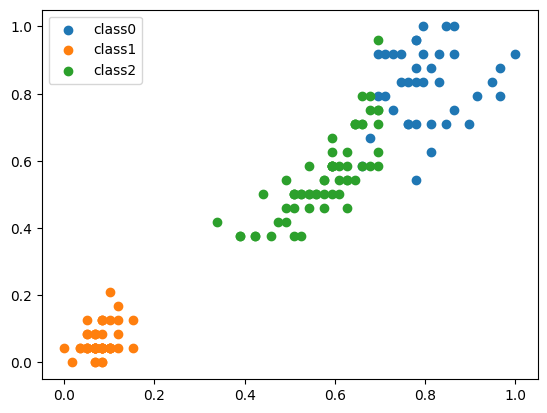

In [302]:
dkm1 = dkm[dkm['target']==0]
dkm2 = dkm[dkm['target']==1]
dkm3 = dkm[dkm['target']==2]
plt.scatter(x=dkm1['petal_length'], y=dkm1['petal_width'], label="class0")
plt.scatter(x=dkm2['petal_length'], y=dkm2['petal_width'], label="class1")
plt.scatter(x=dkm3['petal_length'], y=dkm3['petal_width'], label="class2")
plt.legend()

In [303]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

dkm['sepal_length'] = ms.fit_transform(dkm[['sepal_length']])
dkm['sepal_width'] = ms.fit_transform(dkm[['sepal_width']]) 
dkm['petal_length'] = ms.fit_transform(dkm[['petal_length']])
dkm['petal_width'] = ms.fit_transform(dkm[['petal_width']])
dkm.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


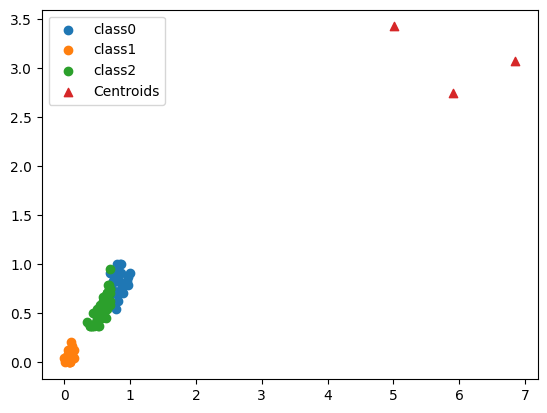

In [304]:
dkm1 = dkm[dkm['target']==0]
dkm2 = dkm[dkm['target']==1]
dkm3 = dkm[dkm['target']==2]

plt.scatter(x=dkm1['petal_length'], y=dkm1['petal_width'], label="class0")
plt.scatter(x=dkm2['petal_length'], y=dkm2['petal_width'], label="class1")
plt.scatter(x=dkm3['petal_length'], y=dkm3['petal_width'], label="class2")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='^', label='Centroids')
plt.legend()

In [305]:
from sklearn.metrics import silhouette_score
silhouette_score(dkm[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], km.labels_)

np.float64(0.4953992934243128)